<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project3 Web APIs & Classification

### Part 2 Data Cleaning and Exploratory Data Analysis

---

## Contents:
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis-and-Feature-Engineering)
- [Feature Engineering](#Exploratory-Data-Analysis-and-Feature-Engineering)

In [1]:
# installations - for first time for the wordcloud
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
?WordCloud

In [2]:
#Import libtaries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import regex as re

### Data Cleaning
1) Removed uncessary columns.<br>
2) Found many rows with null values in the column selftext. Created a new colum feature_var that combines title and selftext and used this colum to gather words.<br>
3) Removed duplicated rows.<br>
4) After cleaning the rows of invalid/ unnecessary rows, combine/concat the cleaned dataframes from both subreddits into 1<br>
5) After combining, columns selftext and title are passed to text_processor function that does the following:<br>
    - removes HTML tags using Beautiful Soup
    - extracts words with letters and replaces punctuations and special characters with blank space
    - convert all characters to lower case
    - lammetize the extracted words
    - removes english stop words and extracts meaningful words from the above list of words
 

In [3]:
#Import the 2 files.
pl=pd.read_csv(r'..\datasets\pl.csv')
nba=pd.read_csv(r'..\datasets\nba.csv')


In [4]:
# removing unnecessary columns
pl = pl[['subreddit','selftext','author_fullname','title','name','author','num_comments']]
nba = nba[['subreddit','selftext','author_fullname','title','name','author','num_comments']]

In [5]:
pl.head(2)

,subreddit,selftext,author_fullname,title,name,author,num_comments
0,PremierLeague,What's on your mind? This is the daily discuss...,t2_6l4z3,r/PremierLeague Daily Discussion,t3_kw9hc1,AutoModerator,1
1,PremierLeague,The front of a football jersey is a huge get f...,t2_1c0fq32l,Football shirt sponsors are often relatively s...,t3_kwjtbr,pi_west,105


In [6]:
pl.isnull().sum()

subreddit            0
selftext           806
author_fullname     11
title                0
name                 0
author               0
num_comments         0
dtype: int64

In [7]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subreddit        1987 non-null   object
 1   selftext         1181 non-null   object
 2   author_fullname  1976 non-null   object
 3   title            1987 non-null   object
 4   name             1987 non-null   object
 5   author           1987 non-null   object
 6   num_comments     1987 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 108.8+ KB


In [8]:
pl.shape,nba.shape

((1987, 7), (2001, 7))

In [9]:
#Created a new colum 'feature_var' that combines 'title' and 'selftext' and used this colum to gather words
pl['feature_var']=pl['title']+' ' +pl['selftext']
pl['feature_var'].fillna(pl['title'],inplace=True) #Filled Null with words from 'title'
nba['feature_var']=nba['title']+' ' +nba['selftext']
nba['feature_var'].fillna(nba['title'],inplace=True)#Filled Null with words from 'title'

In [10]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subreddit        1987 non-null   object
 1   selftext         1181 non-null   object
 2   author_fullname  1976 non-null   object
 3   title            1987 non-null   object
 4   name             1987 non-null   object
 5   author           1987 non-null   object
 6   num_comments     1987 non-null   int64 
 7   feature_var      1987 non-null   object
dtypes: int64(1), object(7)
memory usage: 124.3+ KB


In [11]:
#Check null in feature_var
pl.isnull().sum()

subreddit            0
selftext           806
author_fullname     11
title                0
name                 0
author               0
num_comments         0
feature_var          0
dtype: int64

In [12]:
pl.head()

,subreddit,selftext,author_fullname,title,name,author,num_comments,feature_var
0,PremierLeague,What's on your mind? This is the daily discuss...,t2_6l4z3,r/PremierLeague Daily Discussion,t3_kw9hc1,AutoModerator,1,r/PremierLeague Daily Discussion What's on you...
1,PremierLeague,The front of a football jersey is a huge get f...,t2_1c0fq32l,Football shirt sponsors are often relatively s...,t3_kwjtbr,pi_west,105,Football shirt sponsors are often relatively s...
2,PremierLeague,TEAM STATS as of 13.01.2021\nLiverpool has sco...,t2_3wf1vfav,This are the team stats from the 2020/21 seaso...,t3_kwjttk,maetilliin,19,This are the team stats from the 2020/21 seaso...
3,PremierLeague,PLAYER STATS as of 13.01.2021\nMohamed Salah h...,t2_3wf1vfav,These are the player stats so far through the ...,t3_kwjvpe,maetilliin,6,These are the player stats so far through the ...
4,PremierLeague,After 18 games Sheffield United have finally w...,t2_39afif5m,The crazy bastards finally did it,t3_kvzb7m,joshhirst28,108,The crazy bastards finally did it After 18 gam...


In [13]:
#Drop the null values
pl=pl[pl.feature_var.notna()]
nba=nba[nba.feature_var.notna()]

In [14]:
#Drop duplicated rows
pl.drop_duplicates(subset=['feature_var'], inplace=True)
nba.drop_duplicates(subset=['feature_var'], inplace=True)

In [15]:
pl.shape,nba.shape

((765, 8), (685, 8))

In [16]:
#Reset index
pl.reset_index(drop=True, inplace=True)
nba.reset_index(drop=True, inplace=True)

In [17]:
#Combine the 2 dataframes
combine = pd.concat([pl, nba], join='inner', ignore_index=True)

In [18]:
#Display the first 5 rows of ciombined dataframe
combine.head()

,subreddit,selftext,author_fullname,title,name,author,num_comments,feature_var
0,PremierLeague,What's on your mind? This is the daily discuss...,t2_6l4z3,r/PremierLeague Daily Discussion,t3_kw9hc1,AutoModerator,1,r/PremierLeague Daily Discussion What's on you...
1,PremierLeague,The front of a football jersey is a huge get f...,t2_1c0fq32l,Football shirt sponsors are often relatively s...,t3_kwjtbr,pi_west,105,Football shirt sponsors are often relatively s...
2,PremierLeague,TEAM STATS as of 13.01.2021\nLiverpool has sco...,t2_3wf1vfav,This are the team stats from the 2020/21 seaso...,t3_kwjttk,maetilliin,19,This are the team stats from the 2020/21 seaso...
3,PremierLeague,PLAYER STATS as of 13.01.2021\nMohamed Salah h...,t2_3wf1vfav,These are the player stats so far through the ...,t3_kwjvpe,maetilliin,6,These are the player stats so far through the ...
4,PremierLeague,After 18 games Sheffield United have finally w...,t2_39afif5m,The crazy bastards finally did it,t3_kvzb7m,joshhirst28,108,The crazy bastards finally did it After 18 gam...


In [19]:
#Check the shape
combine.shape

(1450, 8)

In [20]:
combine.describe()

,num_comments
count,1450.000000
mean,71.067586
std,192.658416
min,0.000000
25%,10.000000
50%,24.000000
75%,58.000000
max,4263.000000


In [21]:
#Check the rows based on each sureddit
combine.subreddit.value_counts()

PremierLeague    765
nba              685
Name: subreddit, dtype: int64

In [22]:
#Function to extract the words
def text_processer(text):
    lemm = WordNetLemmatizer()
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(text).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. Lemmatize words.
    lemm_words=[lemm.lemmatize(i) for i in words]
    
    # 5. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    stops.update(['http','https','www','com'])
    
    # 6. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    
    return(" ".join(meaningful_words))  

In [23]:
#Extract words from column 'feature_var' and save into column 'text'
combine['text'] = combine['feature_var'].map(text_processer)

In [24]:
#Display the columns for comparison after text processing.
combine[['text','feature_var']]

,text,feature_var
0,r premierleague daily discussion mind daily di...,r/PremierLeague Daily Discussion What's on you...
1,football shirt sponsors often relatively small...,Football shirt sponsors are often relatively s...
2,team stats season post well love stats team st...,This are the team stats from the 2020/21 seaso...
3,player stats far season post well love stats p...,These are the player stats so far through the ...
4,crazy bastards finally games sheffield united ...,The crazy bastards finally did it After 18 gam...
...,...,...
1445,nba players react harden trade houston rockets...,NBA players react to the Harden trade **Housto...
1446,game thread dallas mavericks charlotte hornets...,GAME THREAD: Dallas Mavericks (5-4) @ Charlott...
1447,game thread milwaukee bucks detroit pistons ja...,GAME THREAD: Milwaukee Bucks (7-4) @ Detroit P...
1448,better career player larry legend kobe trying ...,Better career player.. Larry Legend or Kobe tr...


### Exploratory Data Analysis and Feature Engineering
 
1) The subreddits vary hugely in terms of the number of members. NBA has way more followers with 
   3.8m memebers than Premier League with 324k members.<br>
2) Number of unique posts per subreddit is fairly comparable between the 2 subreddits. <br>
3) The number of comments per posts is significantly higher for NBA subreddit, which is not surprising, given that NBA subreddit has much larger members that Premiew League. <br>
4) Another interesting fact is that the average length per post is way higher for NBA subreddit compared 
    to Premier League subreddit. <br>
5) There are quite a number of words that are commonly seen in both subreddits. not surprising as both 
    subreddits are professional baseketball league. Words like 'team','play', 'game' and 'player' are some 
    of them.<br>
6) Binarize the target column - Subreddit column

In [25]:
combine.shape

(1450, 9)

In [26]:
#Check for an null values in columns selftext and title.
combine.isnull().sum()

subreddit            0
selftext           522
author_fullname      4
title                0
name                 0
author               0
num_comments         0
feature_var          0
text                 0
dtype: int64

In [27]:
combine.shape

(1450, 9)

In [28]:
#Check the rows based on each sureddit
combine.groupby(by='subreddit').count()

,selftext,author_fullname,title,name,author,num_comments,feature_var,text
subreddit,,,,,,,,
PremierLeague,454,761,765,765,765,765,765,765
nba,474,685,685,685,685,685,685,685


In [29]:
#Check the rows based on each sureddit
combine.groupby(by='subreddit')['title'].count()

subreddit
PremierLeague    765
nba              685
Name: title, dtype: int64

#### Number of posts per subreddit.

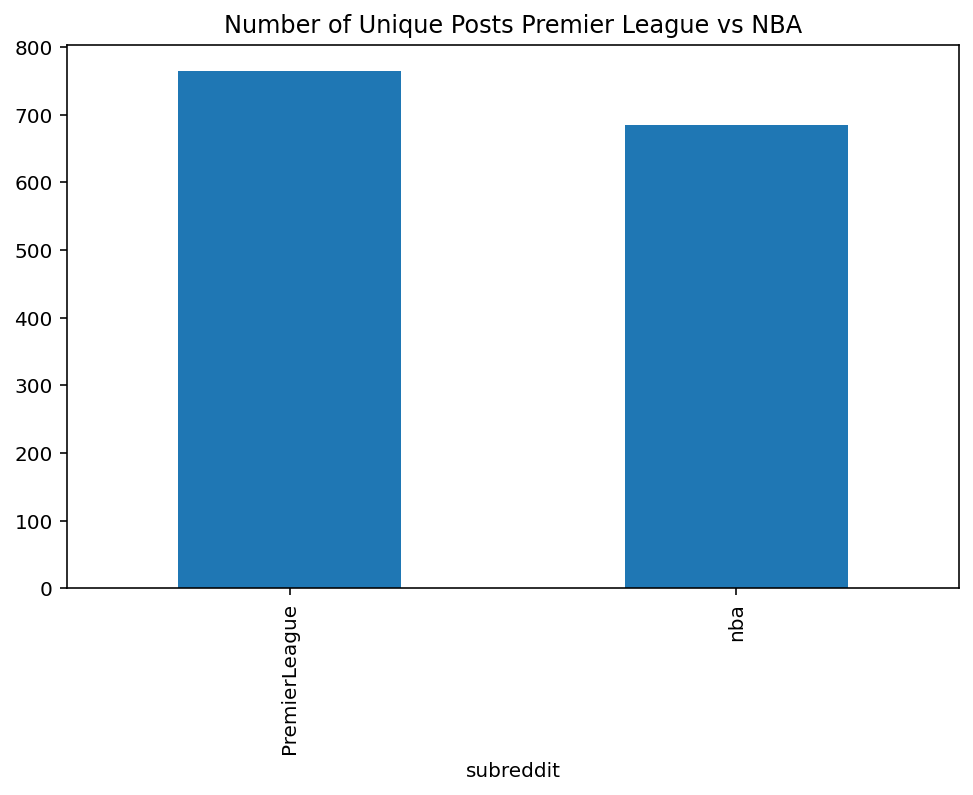

In [30]:
# plotting number of posts per subreddit.
plt.figure(figsize=(8, 5))
# Add a title and show the plot.
plt.title('Number of Unique Posts Premier League vs NBA')
combine.groupby(by='subreddit')['title'].count().plot(kind='bar');

#### Number of comments per subreddit.

In [31]:
#Number of comments per subreddit.
combine.groupby(by='subreddit')['num_comments'].sum()

subreddit
PremierLeague    22508
nba              80540
Name: num_comments, dtype: int64

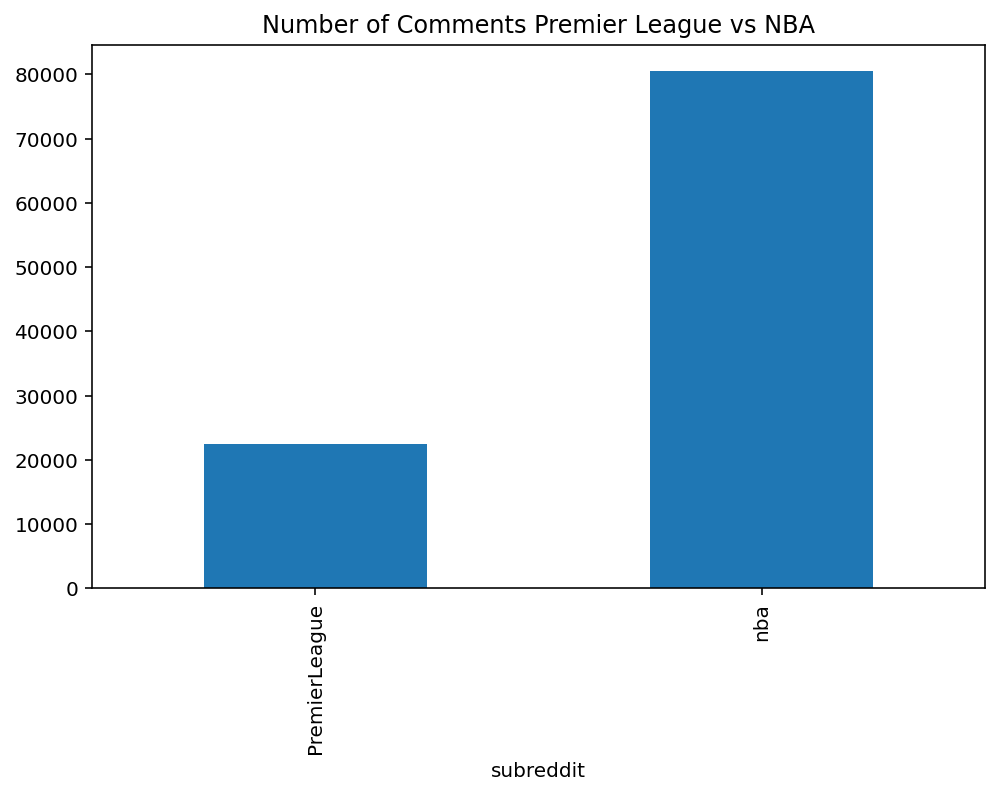

In [32]:
# plotting number of comments per subreddit.
plt.figure(figsize=(8, 5))
# Add a title and show the plot.
plt.title('Number of Comments Premier League vs NBA')
combine.groupby(by='subreddit')['num_comments'].sum().plot(kind='bar');

#### Average length of length of comments per subreddit.

In [33]:
#Average length of length of comments per subreddit.
combine['post_length']=combine['text'].apply(len)

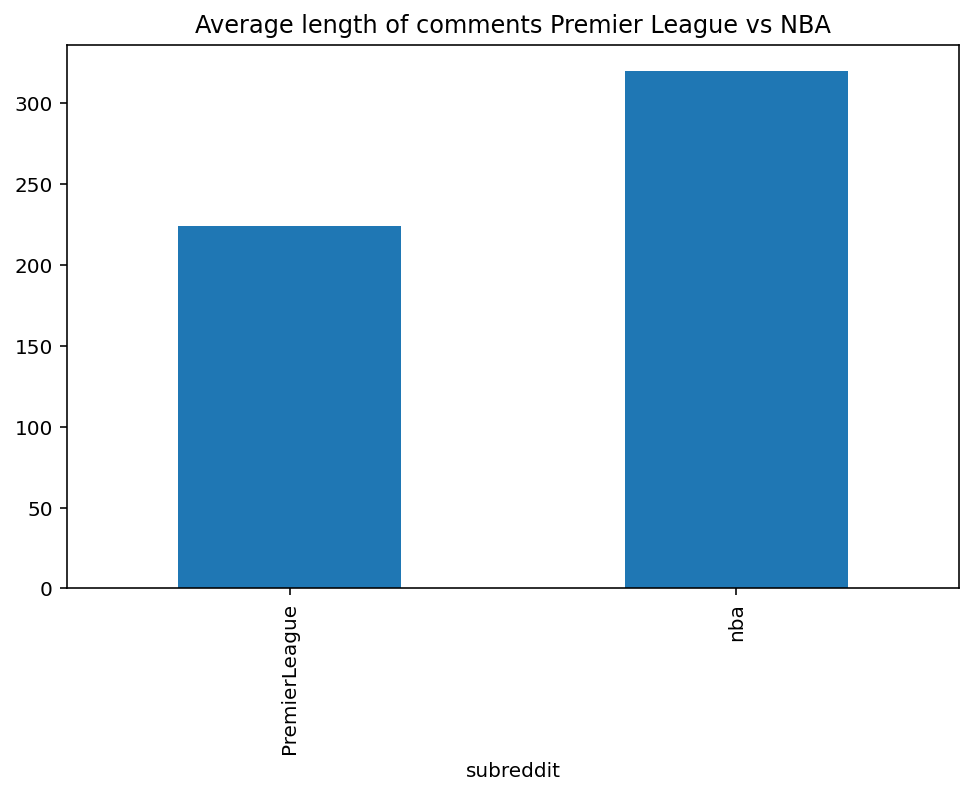

In [34]:
# plotting average length of comments per subreddit.
plt.figure(figsize=(8, 5))
# Add a title and show the plot.
plt.title('Average length of comments Premier League vs NBA')
combine.groupby(by='subreddit')['post_length'].mean().plot(kind='bar');

#### Binarize 'target' column ('Subreddit' column)

In [35]:
#Binarize target column
combine['target']=combine['subreddit'].map(lambda x: 1 if x=='nba' else 0)

In [36]:
#Display the numerized target columns vs original column
combine[['target','subreddit']].head()

,target,subreddit
0,0,PremierLeague
1,0,PremierLeague
2,0,PremierLeague
3,0,PremierLeague
4,0,PremierLeague


In [37]:
#Check the baseline distribution for each subreddit
combine['target'].value_counts(normalize=True)

0    0.527586
1    0.472414
Name: target, dtype: float64

#### Distribution of numberic variables - Length of posts & Number of comments per post and their distribution per Subreddit (target variable)

C:\Users\fast6\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\fast6\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


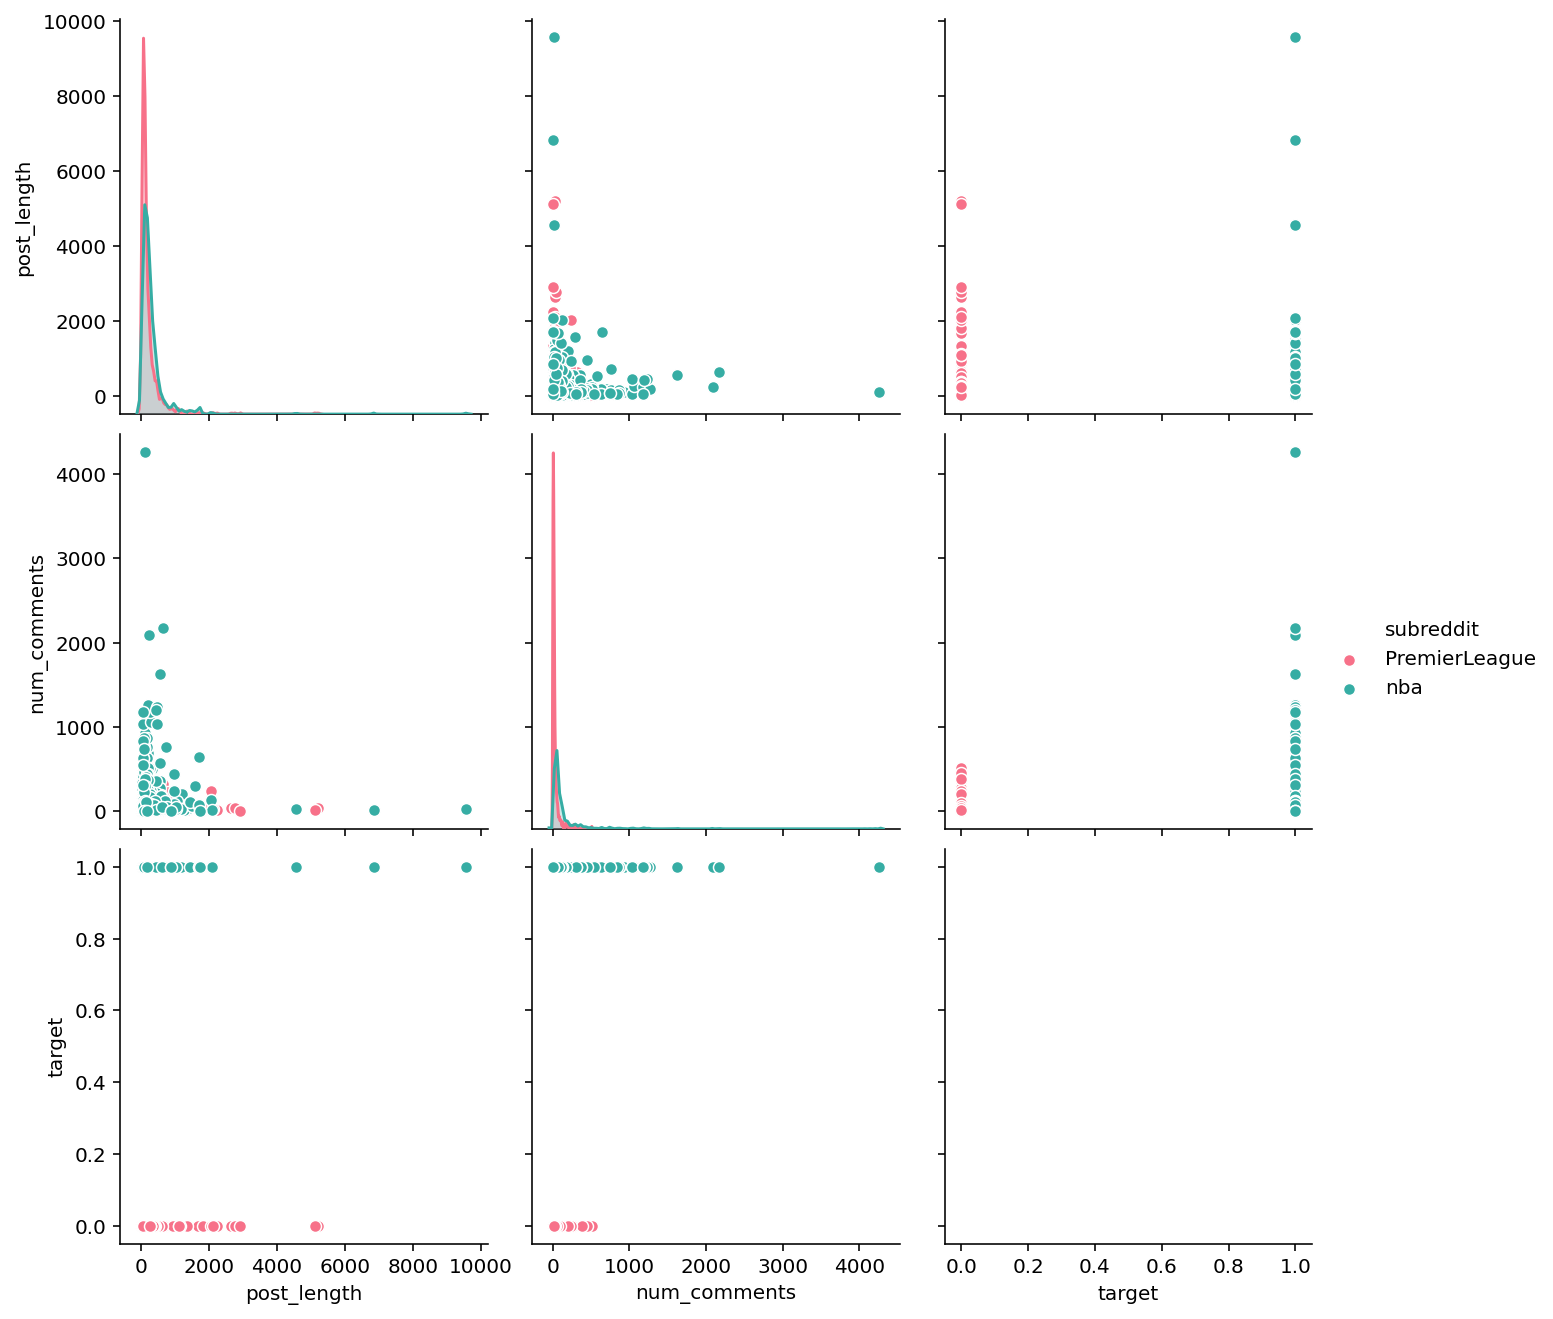

In [38]:
#Display pairplot for numeric columns post length,number of comments and target
np.seterr(divide='ignore', invalid='ignore') ## to hide warning messages
pairplot = sns.pairplot(combine,vars = ['post_length','num_comments','target'], 
                        hue = 'subreddit',
                        palette = 'husl' ,height = 3);

In [39]:
combine.isnull().sum()

subreddit            0
selftext           522
author_fullname      4
title                0
name                 0
author               0
num_comments         0
feature_var          0
text                 0
post_length          0
target               0
dtype: int64

#### Check most commonly used words per subreddit using WordCloud

In [40]:
#Function to create word cloud
def word_cloud(text,title):
    wordcloud = WordCloud(collocations=False,max_font_size=90 , max_words=150, background_color="white").generate(text)
    #word_cloud.to_file("../img/review.pnp)
    print ("There are {} words in the combination of all review.".format(len(text)))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize = 16, weight = 'bold', color = 'blue')
    plt.axis("off")
    plt.tight_layout() #pad = 0
    

In [41]:
# commonly used words per subreddit
PremeL = " ".join(review for review in combine[combine['target']==0]['text'])
nba = " ".join(review for review in combine[combine['target']==1]['text'])

There are 172185 words in the combination of all review.


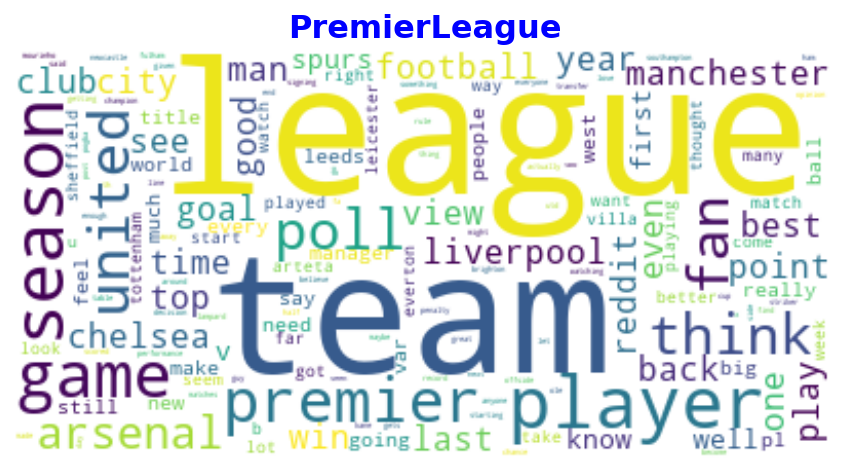

In [42]:
#Word Cloud for Premier League
word_cloud(PremeL,'PremierLeague')

There are 219856 words in the combination of all review.


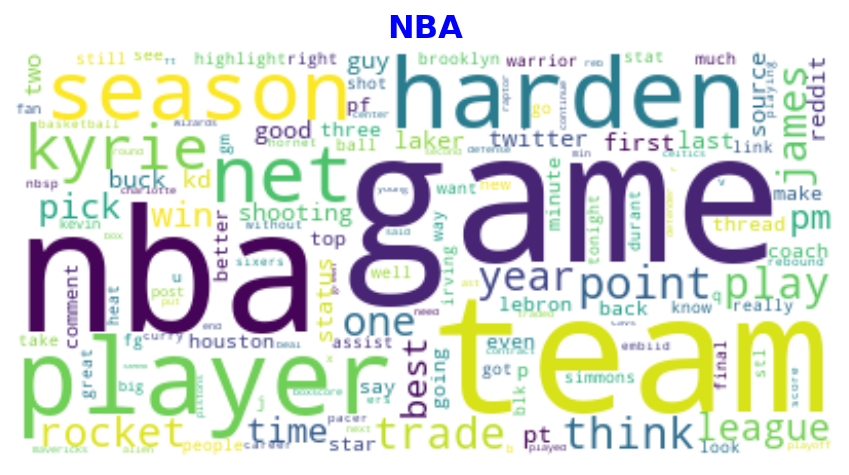

In [43]:
#Word Cloud for NBA
word_cloud(nba,'NBA')

In [44]:
#Save the dataframe
combine.to_csv(r'..\datasets\combine.csv',index=False)

In [45]:
combine.head()

,subreddit,selftext,author_fullname,title,name,author,num_comments,feature_var,text,post_length,target
0,PremierLeague,What's on your mind? This is the daily discuss...,t2_6l4z3,r/PremierLeague Daily Discussion,t3_kw9hc1,AutoModerator,1,r/PremierLeague Daily Discussion What's on you...,r premierleague daily discussion mind daily di...,178,0
1,PremierLeague,The front of a football jersey is a huge get f...,t2_1c0fq32l,Football shirt sponsors are often relatively s...,t3_kwjtbr,pi_west,105,Football shirt sponsors are often relatively s...,football shirt sponsors often relatively small...,1359,0
2,PremierLeague,TEAM STATS as of 13.01.2021\nLiverpool has sco...,t2_3wf1vfav,This are the team stats from the 2020/21 seaso...,t3_kwjttk,maetilliin,19,This are the team stats from the 2020/21 seaso...,team stats season post well love stats team st...,592,0
3,PremierLeague,PLAYER STATS as of 13.01.2021\nMohamed Salah h...,t2_3wf1vfav,These are the player stats so far through the ...,t3_kwjvpe,maetilliin,6,These are the player stats so far through the ...,player stats far season post well love stats p...,725,0
4,PremierLeague,After 18 games Sheffield United have finally w...,t2_39afif5m,The crazy bastards finally did it,t3_kvzb7m,joshhirst28,108,The crazy bastards finally did it After 18 gam...,crazy bastards finally games sheffield united ...,107,0
